In [1]:
import pandas as pd
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

In [5]:
# reads in dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

guess_who = pd.read_excel('/content/drive/My Drive/Colab Notebooks/GuessWho.xlsx')
guess_who.head()

Mounted at /content/drive


,Name,Race,Facial Hair,Hat,Glasses,Sex,EyeColor,HairColor,Hair,Smile,Nose,Lips
0,Alex,0,1,0,0,1,Brown,Brown,1,1,0,1
1,Alfred,0,1,0,0,1,Blue,Red,1,0,1,0
2,Anita,0,0,0,0,0,Blue,Blonde,1,1,0,0
3,Anne,1,0,0,0,0,Brown,Brown,1,0,1,0
4,Bernard,0,0,1,0,1,Brown,Brown,1,0,1,0


In [6]:
# Encodes Label of EyeColor and HairColor features
encoder = LabelEncoder()

guess_who.HairColor = encoder.fit_transform(guess_who.HairColor)
guess_who.EyeColor = encoder.fit_transform(guess_who.EyeColor)

In [7]:
# Splits target and features into two differenct dataframes
target = guess_who.Name
features = guess_who.drop('Name', axis = 1)
feature_names = features.columns.values.tolist()

In [8]:
# Creates tree and prints the importance of each feature
decisiontree = DecisionTreeClassifier(min_samples_leaf=1, random_state = 4)
model = decisiontree.fit(features, target)
feature_importances = model.feature_importances_
print(feature_importances)

[0.03051439 0.07052214 0.04577158 0.07628596 0.06357164 0.12578708
 0.2151022  0.09357745 0.09578127 0.06102877 0.12205754]


In [9]:
#Prints max depth of tree and number of leaves, there are only 35 leaves but that is a sacrifice
print(model.tree_.max_depth)

9


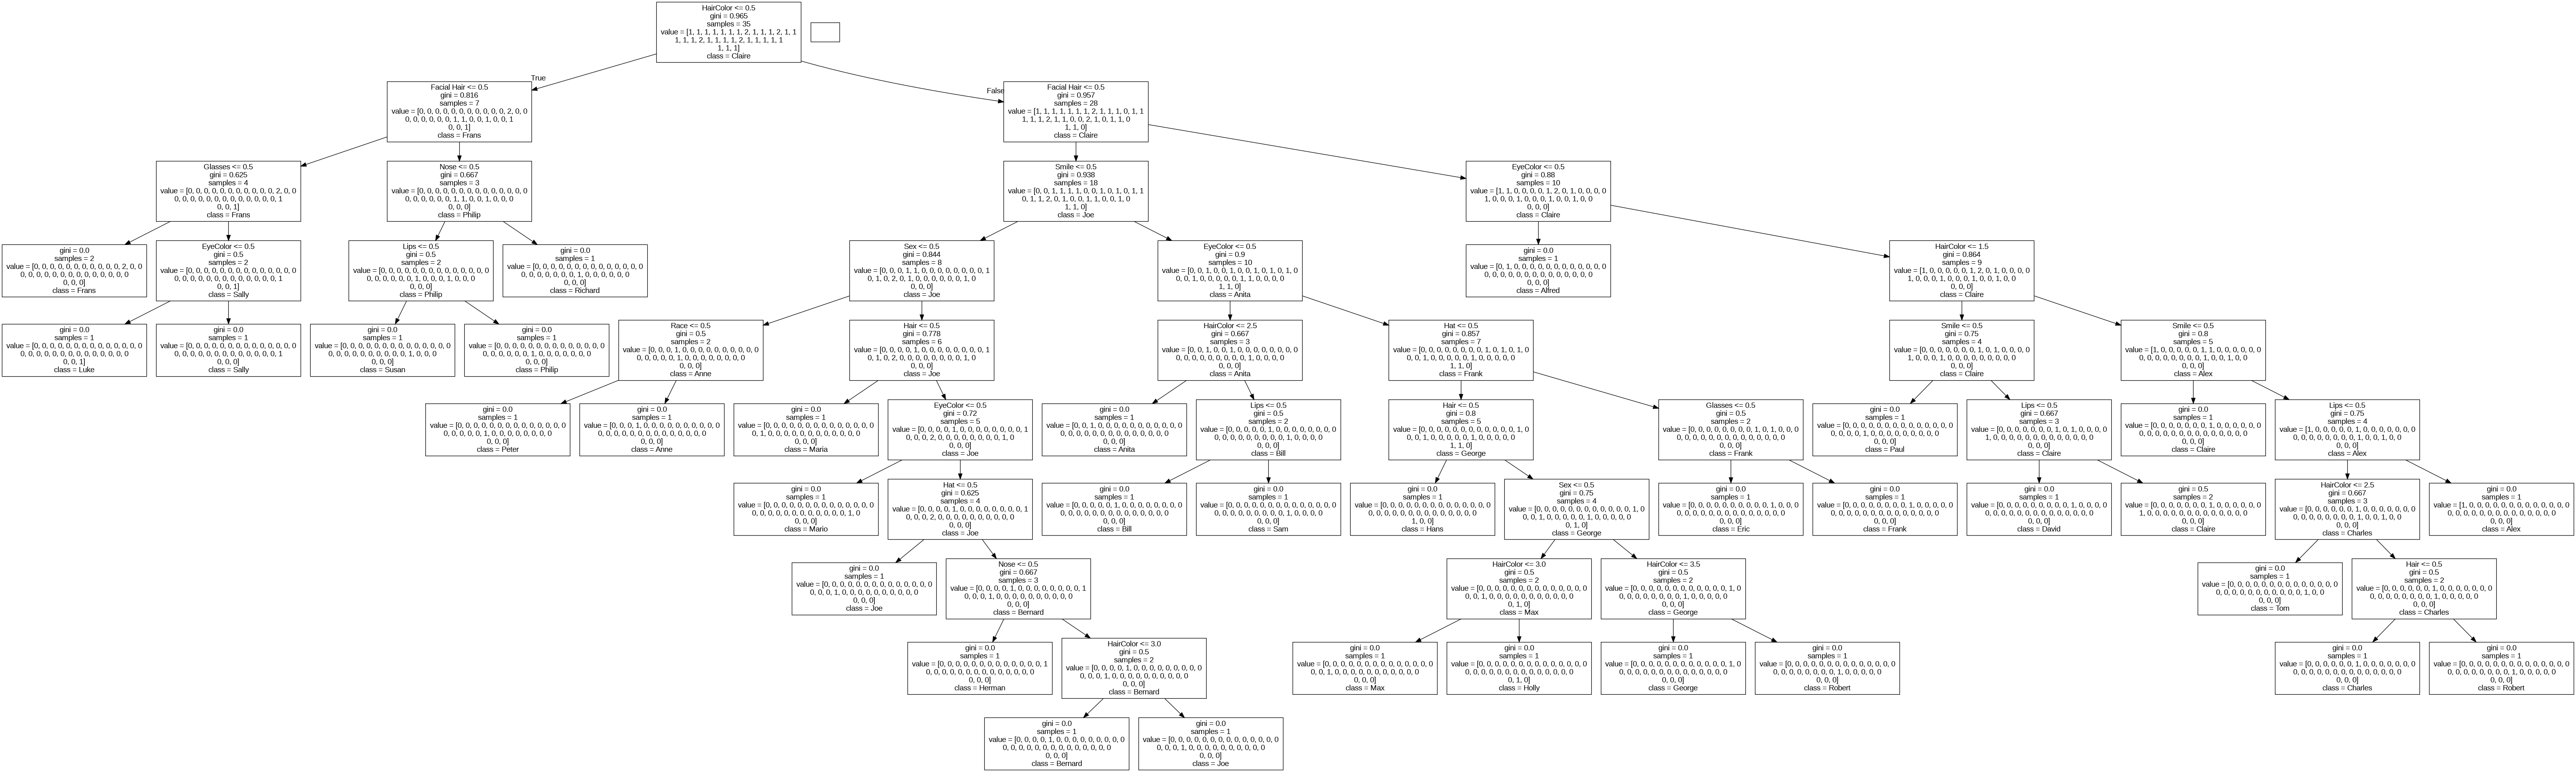

In [10]:
# Displays tree

dot_data_tree = tree.export_graphviz(decisiontree,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=guess_who.Name)
graph = pydotplus.graph_from_dot_data(dot_data_tree)
Image(graph.create_png())


In [11]:
# Saves image
graph.write_png('/content/drive/My Drive/Colab Notebooks/decisionTree')

True